In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

***
### Read Data File (WeNet)

In [2]:
cols = list(pd.read_csv("net_aigenerated_data_wenet_performance_stu.csv", nrows=1))
print(cols)

net_aigenerated_data_wenet = pd.read_csv('/projectnb/ds549/projects/AImpower/wenet-evals/net_aigenerated_data_wenet_performance_stu.csv', delimiter=',', usecols =[i for i in cols if "Unnamed:" not in i])


['Unnamed: 0', 'Filename', 'Start_time', 'End_time', 'WeNet', 'WER', 'Stutterance_Count', 'NA_Count', 'NA_Cleaned_Count', 'WER_Binned', 'rouge1-precision', 'rouge1-recall', 'rouge1-f1', 'rouge2-precision', 'rouge2-recall', 'rouge2-f1', 'rougel-precision', 'rougel-recall', 'rougel-f1', 'Cleaned_Transcript', 'GroundTruth_Transcript']


In [3]:
net_aigenerated_data_wenet = net_aigenerated_data_wenet.assign(Duration=net_aigenerated_data_wenet['End_time']-net_aigenerated_data_wenet['Start_time'])
net_aigenerated_data_wenet = net_aigenerated_data_wenet.assign(Freq_Duration=net_aigenerated_data_wenet["Stutterance_Count"]/net_aigenerated_data_wenet["Duration"])
net_aigenerated_data_wenet = net_aigenerated_data_wenet.assign(Freq_CharCount=net_aigenerated_data_wenet["Stutterance_Count"]/net_aigenerated_data_wenet["GroundTruth_Transcript"].str.len())


In [4]:
net_aigenerated_data_wenet

,Filename,Start_time,End_time,WeNet,WER,Stutterance_Count,NA_Count,NA_Cleaned_Count,WER_Binned,rouge1-precision,...,rouge2-recall,rouge2-f1,rougel-precision,rougel-recall,rougel-f1,Cleaned_Transcript,GroundTruth_Transcript,Duration,Freq_Duration,Freq_CharCount
0,D0001_A,2081.540000,2109.650000,我说出来就比较地需要时间然后那个识别的他的不就是他等你一会你那个话还没有说完的还没有说出来的...,0.226804,1.0,100,0,0.23,0.837838,...,0.491803,0.521739,0.803279,0.700000,0.748092,我说出来就比较的需要时间，哦，然后那个嗯识别的它的就是它等你一会儿，你那个话还没有说完，的还...,我说出来就比较的需要时间，哦，然后那个嗯/i识别的它的就是它等你一会儿，你那个话还没有说完，...,28.110000,0.035575,0.010101
1,D0001_A,790.130000,796.580000,第四句有我我说的话,0.500000,1.0,100,0,0.50,0.800000,...,0.333333,0.363636,0.666667,0.571429,0.615385,电视剧有，我说的话。,电视剧有，我/r说的话。,6.450000,0.155039,0.083333
2,D0001_A,1562.083518,1586.220000,这部剧是不怎么评分是不怎么好的就因为评评论区的那那些人他们都在说拿到号做好惨的那个就那么勤奋...,0.203125,10.0,100,0,0.20,0.806452,...,0.525000,0.567568,0.828571,0.690476,0.753247,这部剧是不怎么，评分是不怎么好的，呃就因为呃评论区的那些人，他们都在说，呃男二号就好惨的那个...,这/b部剧是不怎么，评分是不怎么好的，呃/i就因为呃/i评/r/b论区的那[那]些人，他们都...,24.136482,0.414311,0.117647
3,D0001_A,2016.780000,2035.673559,很精准对讯飞语音还是讯飞助手来着就我记得他是叫讯飞我之前就是他,0.210526,7.0,100,0,0.21,0.888889,...,0.464286,0.541667,0.863636,0.612903,0.716981,很精准，对，呃讯飞语音还是讯飞助手来着，就我记得它是叫讯飞，我之前就是它呃是,很[很/b]精准，对，呃/i讯飞语音还是讯飞助手来着，就[就]我记得它是叫讯/r飞，我之前就...,18.893559,0.370497,0.129630
4,D0001_A,1682.670000,1709.110000,一个个是叫啥来的我忘了就是出现了这一个人然后呢他他就射了一把剑然后就就把那个拿二号给长杀了就...,0.250000,8.0,100,0,0.25,0.806452,...,0.454545,0.481928,0.761905,0.653061,0.703297,一个那个是嗯叫啥来着，我忘了，就是出现了另一个人，然后呢他就射了一把剑，然后就把那个嗯男二号...,一个那个是嗯/i叫啥来着，我忘了，就是出现了另/r/b一个人，然后呢他[他]就射/p了一把剑...,26.440000,0.302572,0.093023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37248,P0070,2586.616000,2589.346000,单曲循环歌曲这样而已,0.090909,0.0,100,0,0.09,1.000000,...,0.800000,0.888889,1.000000,0.833333,0.909091,单曲循环歌曲这样而已。,单曲循环歌曲这样而已。,2.730000,0.000000,0.000000
37249,P0070,2782.496000,2783.706000,杨幂的电影,0.166667,0.0,100,0,0.17,1.000000,...,0.666667,0.800000,1.000000,0.750000,0.857143,杨幂的电影。,杨幂的电影。,1.210000,0.000000,0.000000
37250,P0070,2995.296000,2998.116000,你好米娅今天柴油价怎么样,0.266667,0.0,100,0,0.27,0.833333,...,0.375000,0.461538,0.833333,0.555556,0.666667,你好，米雅，今天柴油价怎么样。,你好，米雅，今天柴油价怎么样。,2.820000,0.000000,0.000000
37251,P0070,2604.066000,2606.656000,单曲循环歌曲琉璃光之歌,0.083333,0.0,100,0,0.08,1.000000,...,0.800000,0.888889,1.000000,0.833333,0.909091,单曲循环歌曲琉璃光之歌。,单曲循环歌曲琉璃光之歌。,2.590000,0.000000,0.000000


In [5]:
## SAVING

net_aigenerated_data_wenet.to_csv('net_aigenerated_data_wenet_performance_stu.csv', sep=',')

# net_aigenerated_data_wenet

## Visualization (WeNet)

### Frequency setup: stuttering count/second

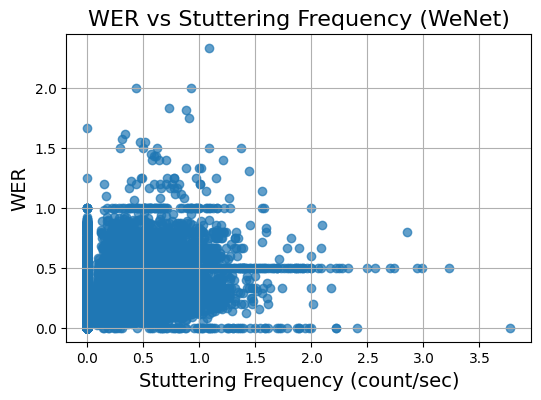

In [6]:
plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_wenet["Freq_Duration"], 
    net_aigenerated_data_wenet["WER"], 
    alpha=0.7  # Handle overlapping points
)

plt.title("WER vs Stuttering Frequency (WeNet)", fontsize=16)
plt.xlabel("Stuttering Frequency (count/sec)", fontsize=14)
plt.ylabel("WER", fontsize=14)
plt.grid(True)
plt.show()

In [7]:
from scipy.stats import spearmanr
rho, p = spearmanr(net_aigenerated_data_wenet.dropna()['Freq_Duration'], net_aigenerated_data_wenet.dropna()['WER'])
print(f"p-value = {p}")
print(f"rho = {rho}")

p-value = 0.0320386065013084
rho = -0.011123559516595265


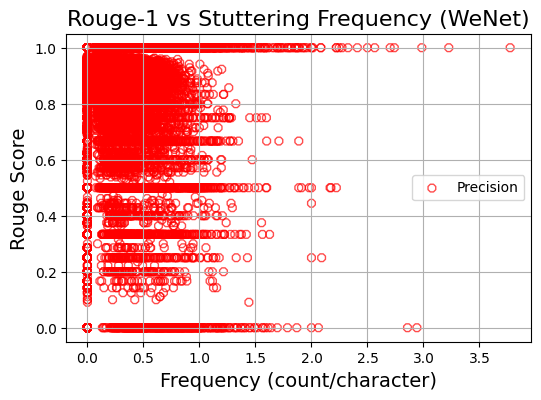

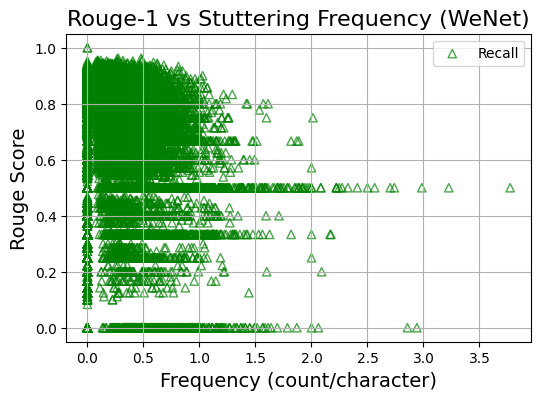

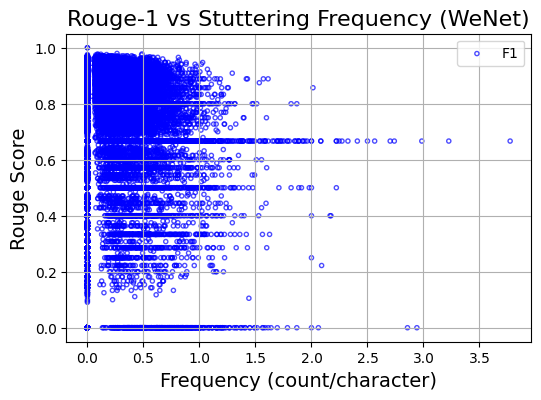

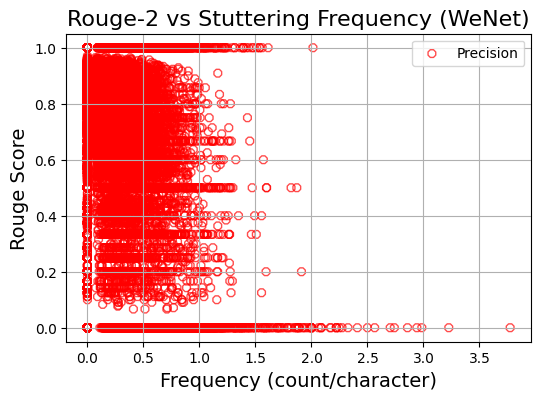

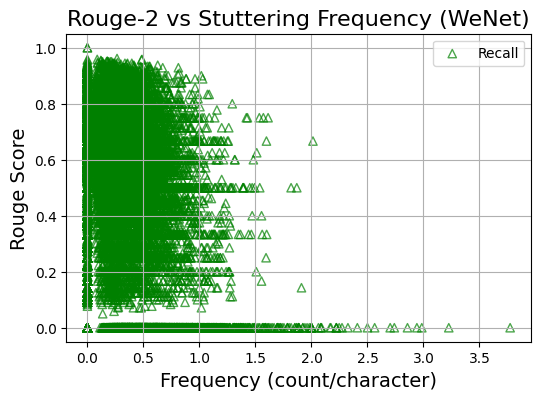

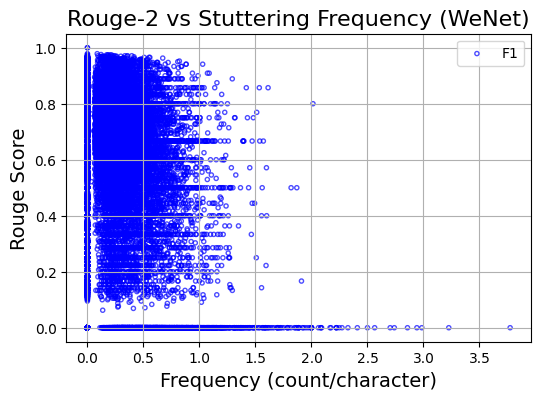

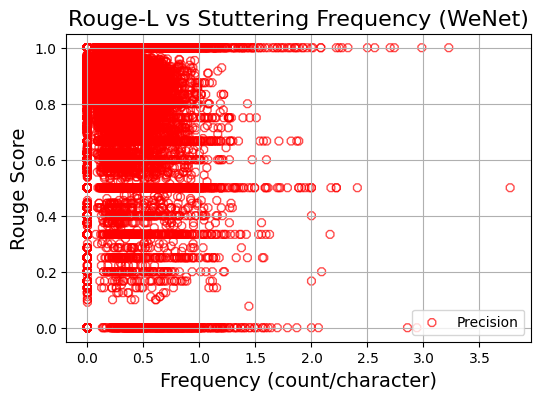

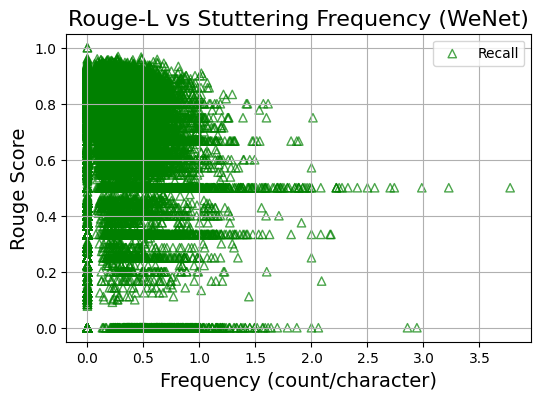

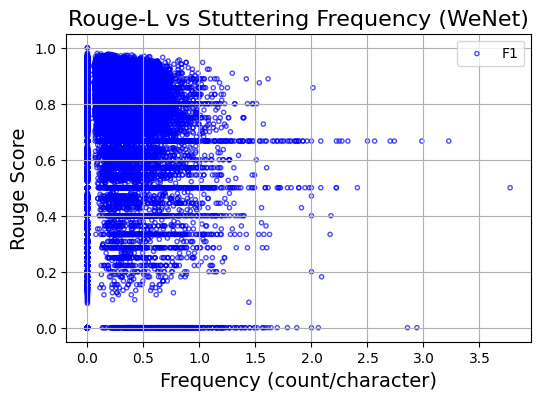

In [8]:
plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_wenet["Freq_Duration"], 
    net_aigenerated_data_wenet["rouge1-precision"], 
    facecolors="none", edgecolors='r',
    label="Precision",
    marker="8",
    alpha=0.7  # Handle overlapping points
)
plt.title("Rouge-1 vs Stuttering Frequency (WeNet)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()
plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_wenet["Freq_Duration"], 
    net_aigenerated_data_wenet["rouge1-recall"], 
    facecolors="none", edgecolors='g',
    label="Recall",
    marker="^",
    alpha=0.7  # Handle overlapping points
)
plt.title("Rouge-1 vs Stuttering Frequency (WeNet)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_wenet["Freq_Duration"], 
    net_aigenerated_data_wenet["rouge1-f1"], 
    facecolors="none", edgecolors='b',
    label="F1",
    marker=".",
    alpha=0.7  # Handle overlapping points
)


plt.title("Rouge-1 vs Stuttering Frequency (WeNet)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################

plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_wenet["Freq_Duration"], 
    net_aigenerated_data_wenet["rouge2-precision"], 
    facecolors="none", edgecolors='r',
    label="Precision",
    marker="8",
    alpha=0.7  # Handle overlapping points
)
plt.title("Rouge-2 vs Stuttering Frequency (WeNet)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_wenet["Freq_Duration"], 
    net_aigenerated_data_wenet["rouge2-recall"], 
    facecolors="none", edgecolors='g',
    label="Recall",
    marker="^",
    alpha=0.7  # Handle overlapping points
)
plt.title("Rouge-2 vs Stuttering Frequency (WeNet)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_wenet["Freq_Duration"], 
    net_aigenerated_data_wenet["rouge2-f1"], 
    facecolors="none", edgecolors='b',
    label="F1",
    marker=".",
    alpha=0.7  # Handle overlapping points
)

plt.title("Rouge-2 vs Stuttering Frequency (WeNet)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################

plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_wenet["Freq_Duration"], 
    net_aigenerated_data_wenet["rougel-precision"], 
    facecolors="none", edgecolors='r',
    label="Precision",
    marker="8",
    alpha=0.7  # Handle overlapping points
)
plt.title("Rouge-L vs Stuttering Frequency (WeNet)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_wenet["Freq_Duration"], 
    net_aigenerated_data_wenet["rougel-recall"], 
    facecolors="none", edgecolors='g',
    label="Recall",
    marker="^",
    alpha=0.7  # Handle overlapping points
)
plt.title("Rouge-L vs Stuttering Frequency (WeNet)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_wenet["Freq_Duration"], 
    net_aigenerated_data_wenet["rougel-f1"], 
    facecolors="none", edgecolors='b',
    label="F1",
    marker=".",
    alpha=0.7  # Handle overlapping points
)

plt.title("Rouge-L vs Stuttering Frequency (WeNet)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

In [9]:
from scipy.stats import spearmanr

rho, p = spearmanr(net_aigenerated_data_wenet.dropna()['Freq_Duration'], net_aigenerated_data_wenet.dropna()['rouge1-f1'])
print(f"p-value [stuttering count & rouge-1 f1] = {p}")
print(f"rho [stuttering count & rouge-1 f1] = {rho}")


rho, p = spearmanr(net_aigenerated_data_wenet.dropna()['Freq_Duration'], net_aigenerated_data_wenet.dropna()['rouge2-f1'])
print(f"p-value [stuttering count & rouge-2 f1] = {p}")
print(f"rho [stuttering count & rouge-2 f1] = {rho}")


rho, p = spearmanr(net_aigenerated_data_wenet.dropna()['Freq_Duration'], net_aigenerated_data_wenet.dropna()['rougel-f1'])
print(f"p-value [stuttering count & rouge-L f1] = {p}")
print(f"rho [stuttering count & rouge-L f1] = {rho}")

p-value [stuttering count & rouge-1 f1] = 1.6147790645624084e-133
rho [stuttering count & rouge-1 f1] = 0.12706940001476447
p-value [stuttering count & rouge-2 f1] = 1.2386311012215861e-34
rho [stuttering count & rouge-2 f1] = 0.06362345298777329
p-value [stuttering count & rouge-L f1] = 8.969995517132411e-54
rho [stuttering count & rouge-L f1] = 0.07997701882511145


### Frequency Setup: Stuttering Count/Character

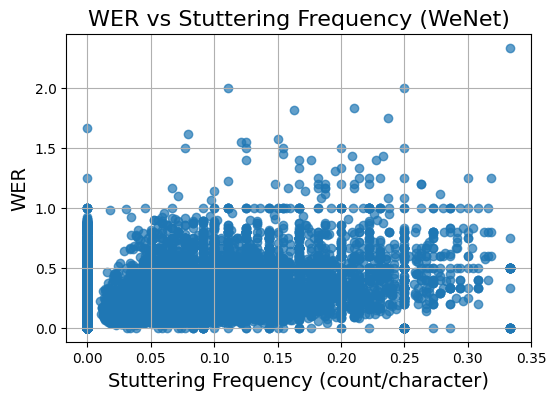

In [10]:
plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_wenet["Freq_CharCount"], 
    net_aigenerated_data_wenet["WER"], 
    alpha=0.7  # Handle overlapping points
)

plt.title("WER vs Stuttering Frequency (WeNet)", fontsize=16)
plt.xlabel("Stuttering Frequency (count/character)", fontsize=14)
plt.ylabel("WER", fontsize=14)
plt.grid(True)
plt.show()

In [11]:
from scipy.stats import spearmanr
rho, p = spearmanr(net_aigenerated_data_wenet.dropna()['Freq_CharCount'], net_aigenerated_data_wenet.dropna()['WER'])
print(f"p-value = {p}")
print(f"rho = {rho}")

p-value = 0.802277170837967
rho = -0.0012992207950383822


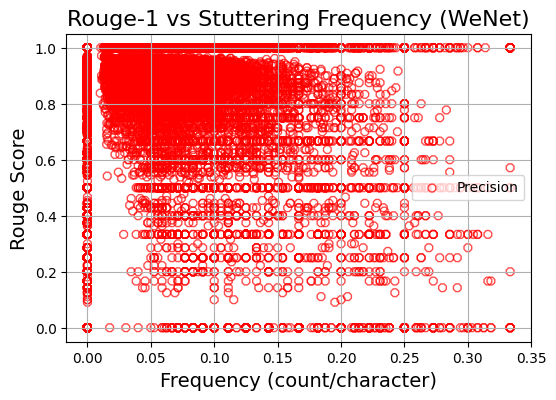

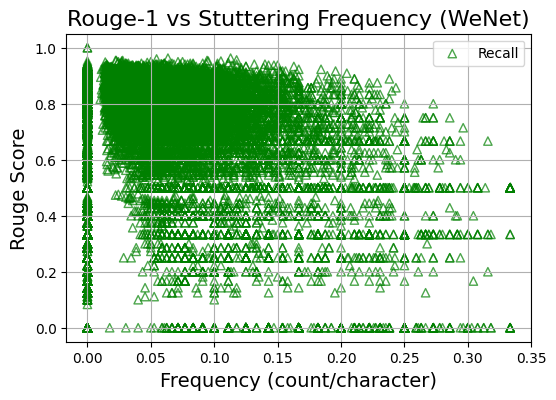

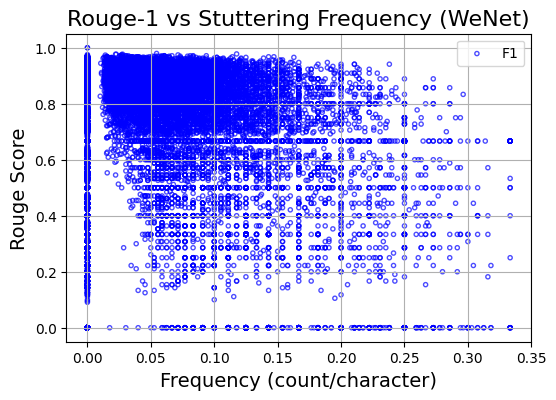

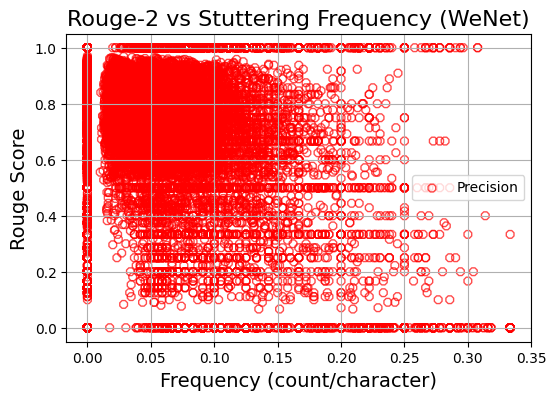

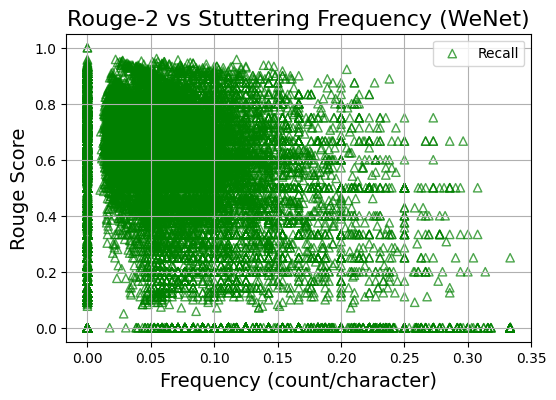

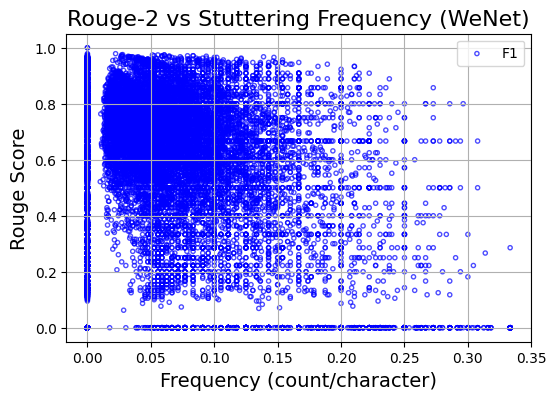

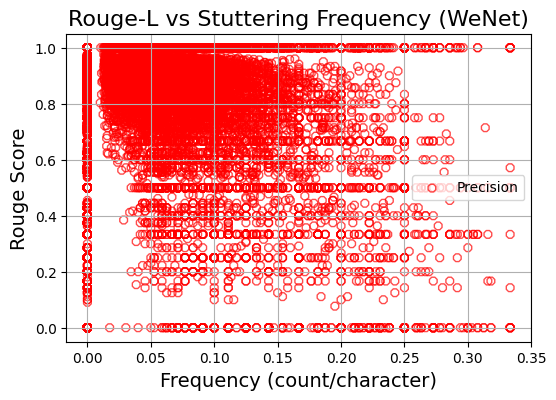

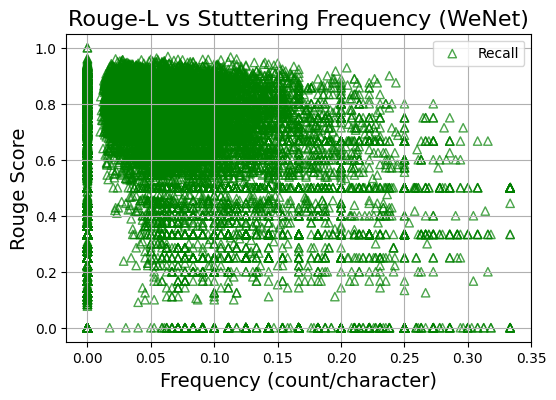

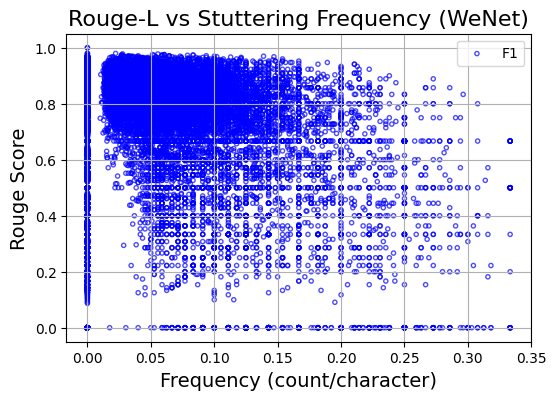

In [12]:
plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_wenet["Freq_CharCount"], 
    net_aigenerated_data_wenet["rouge1-precision"], 
    facecolors="none", edgecolors='r',
    label="Precision",
    marker="8",
    alpha=0.7  # Handle overlapping points
)
plt.title("Rouge-1 vs Stuttering Frequency (WeNet)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()
plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_wenet["Freq_CharCount"], 
    net_aigenerated_data_wenet["rouge1-recall"], 
    facecolors="none", edgecolors='g',
    label="Recall",
    marker="^",
    alpha=0.7  # Handle overlapping points
)
plt.title("Rouge-1 vs Stuttering Frequency (WeNet)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_wenet["Freq_CharCount"], 
    net_aigenerated_data_wenet["rouge1-f1"], 
    facecolors="none", edgecolors='b',
    label="F1",
    marker=".",
    alpha=0.7  # Handle overlapping points
)


plt.title("Rouge-1 vs Stuttering Frequency (WeNet)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################

plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_wenet["Freq_CharCount"], 
    net_aigenerated_data_wenet["rouge2-precision"], 
    facecolors="none", edgecolors='r',
    label="Precision",
    marker="8",
    alpha=0.7  # Handle overlapping points
)
plt.title("Rouge-2 vs Stuttering Frequency (WeNet)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_wenet["Freq_CharCount"], 
    net_aigenerated_data_wenet["rouge2-recall"], 
    facecolors="none", edgecolors='g',
    label="Recall",
    marker="^",
    alpha=0.7  # Handle overlapping points
)
plt.title("Rouge-2 vs Stuttering Frequency (WeNet)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_wenet["Freq_CharCount"], 
    net_aigenerated_data_wenet["rouge2-f1"], 
    facecolors="none", edgecolors='b',
    label="F1",
    marker=".",
    alpha=0.7  # Handle overlapping points
)

plt.title("Rouge-2 vs Stuttering Frequency (WeNet)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################

plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_wenet["Freq_CharCount"], 
    net_aigenerated_data_wenet["rougel-precision"], 
    facecolors="none", edgecolors='r',
    label="Precision",
    marker="8",
    alpha=0.7  # Handle overlapping points
)
plt.title("Rouge-L vs Stuttering Frequency (WeNet)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_wenet["Freq_CharCount"], 
    net_aigenerated_data_wenet["rougel-recall"], 
    facecolors="none", edgecolors='g',
    label="Recall",
    marker="^",
    alpha=0.7  # Handle overlapping points
)
plt.title("Rouge-L vs Stuttering Frequency (WeNet)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_wenet["Freq_CharCount"], 
    net_aigenerated_data_wenet["rougel-f1"], 
    facecolors="none", edgecolors='b',
    label="F1",
    marker=".",
    alpha=0.7  # Handle overlapping points
)

plt.title("Rouge-L vs Stuttering Frequency (WeNet)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

In [13]:
from scipy.stats import spearmanr

rho, p = spearmanr(net_aigenerated_data_wenet.dropna()['Freq_CharCount'], net_aigenerated_data_wenet.dropna()['rouge1-f1'])
print(f"p-value [stuttering count & rouge-1 f1] = {p}")
print(f"rho [stuttering count & rouge-1 f1] = {rho}")


rho, p = spearmanr(net_aigenerated_data_wenet.dropna()['Freq_CharCount'], net_aigenerated_data_wenet.dropna()['rouge2-f1'])
print(f"p-value [stuttering count & rouge-2 f1] = {p}")
print(f"rho [stuttering count & rouge-2 f1] = {rho}")


rho, p = spearmanr(net_aigenerated_data_wenet.dropna()['Freq_CharCount'], net_aigenerated_data_wenet.dropna()['rougel-f1'])
print(f"p-value [stuttering count & rouge-L f1] = {p}")
print(f"rho [stuttering count & rouge-L f1] = {rho}")

p-value [stuttering count & rouge-1 f1] = 7.726630641272845e-98
rho [stuttering count & rouge-1 f1] = 0.10859711787343267
p-value [stuttering count & rouge-2 f1] = 4.44005048687862e-23
rho [stuttering count & rouge-2 f1] = 0.05129947676920343
p-value [stuttering count & rouge-L f1] = 7.626934956121869e-35
rho [stuttering count & rouge-L f1] = 0.0638261504378016
